In [1]:
import sys
sys.path.append('/home/silke/Python/radarlecture2016/radarmeteorology/common')
import warnings
warnings.filterwarnings('ignore')
from helper import create_filename
import pandas as pd 
import numpy as np
import datetime as dt
from scipy import stats
import wradlib as wrl
from scipy import ndimage
import math
import matplotlib.pyplot as pl
import matplotlib as mpl
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import os
import glob
import scipy
from pandas import rolling_median
from scipy import interpolate
from scipy.stats import linregress
import numpy.ma as ma
from numpy import asarray as ar

In [2]:
datepath="/home/silke/Python/output/Riming/"
#dates = sorted(glob.glob(datepath + "20*/"))
#print(dates[1][33:43])
#for l in range(len(dates)):
#    dates[l]=dates[l][33:43]
#print(dates)
###Versteh Fehler nicht, lasse erstmal 2013-05-29 weg
##Ich glaub 2015-04-02 gibts keine Wippeninfo, ebenfalls weg, fast das komplette 2015 faellt weg
##-> war nur bei Lanuv-Stationen so, hab nun Stadt Bonn Daten drin
##Ich glaub '2015-04-04'ist die ML zu niedrig
##, '2016-01-10' '2016-01-11', '2016-01-13'taugen auch nichts
## , '2016-01-02',  hab ich nun noch nicht bei Stadt Bonn Daten!!!
datesredu=['2013-04-12','2014-05-06','2014-05-27','2014-06-28','2014-07-08','2014-07-09','2014-10-07','2014-10-08','2014-11-04','2014-12-12',
       '2015-03-29','2015-04-02','2015-05-03',
       '2015-06-02', '2015-06-23', '2015-08-04','2015-08-17','2015-08-27','2015-09-01','2015-09-13', 
       '2015-09-16','2015-09-22','2015-10-05','2015-11-17', '2015-11-19', '2015-11-29', '2015-12-04', 
       '2015-12-08','2015-12-09',
       '2015-12-11', '2015-12-16', '2015-12-22', '2015-12-25','2016-01-07','2016-01-30','2016-09-04']
#erste Zeile, 2 Termine neu
#zweite Zeile bis 7 neu
dates=['2014-08-26','2016-09-04','2014-10-09','2014-07-05',
        '2015-06-22','2015-02-27','2015-01-08','2015-01-02','2014-12-19','2014-11-16','2014-10-15',
        '2013-04-12','2013-07-03','2014-05-06','2014-05-27','2014-06-28','2014-07-08','2014-07-09','2014-10-07','2014-10-08','2014-11-04','2014-12-12',
       '2015-03-29','2015-04-02','2015-05-03','2015-05-29',
       '2015-06-02', '2015-06-13','2015-06-23', '2015-07-13','2015-08-04','2015-08-08','2015-08-17',
       '2015-08-27','2015-09-01','2015-09-13', 
       '2015-09-16','2015-09-22','2015-10-05','2015-11-06','2015-11-17', '2015-11-19', '2015-11-20',
       '2015-11-29', '2015-12-08','2015-12-09',
       '2015-12-11', '2015-12-16', '2015-12-22', '2015-12-25','2016-01-02','2016-01-07']
print(dates)


['2014-08-26', '2016-09-04', '2014-10-09', '2014-07-05', '2015-06-22', '2015-02-27', '2015-01-08', '2015-01-02', '2014-12-19', '2014-11-16', '2014-10-15', '2013-04-12', '2013-07-03', '2014-05-06', '2014-05-27', '2014-06-28', '2014-07-08', '2014-07-09', '2014-10-07', '2014-10-08', '2014-11-04', '2014-12-12', '2015-03-29', '2015-04-02', '2015-05-03', '2015-05-29', '2015-06-02', '2015-06-13', '2015-06-23', '2015-07-13', '2015-08-04', '2015-08-08', '2015-08-17', '2015-08-27', '2015-09-01', '2015-09-13', '2015-09-16', '2015-09-22', '2015-10-05', '2015-11-06', '2015-11-17', '2015-11-19', '2015-11-20', '2015-11-29', '2015-12-08', '2015-12-09', '2015-12-11', '2015-12-16', '2015-12-22', '2015-12-25', '2016-01-02', '2016-01-07']


('ews, ewi, diff', 2.4483262381675517, 2.172991339290272, 0.2753348988772797)
2014-08-26
ht12, Pressure, Mixing ratio, RH, ewi, ew, sswrtice, RHSfc, Wkm/h
(4770.0, array(557.07142857), array(2.1210084), array(75.46008403), 2.172991339290272, 1.899603185325577, -0.12581189304416984, array(97.44295302), array(26.22268908))
2016-09-04
ht12, Pressure, Mixing ratio, RH, ewi, ew, sswrtice, RHSfc, Wkm/h
(5660.0, array(505.94339623), array(2.21037736), array(72.69811321), 2.172991339290272, 1.7979514914737769, -0.1725915060199863, array(61.32417582), array(35.8490566))
2014-10-09
ht12, Pressure, Mixing ratio, RH, ewi, ew, sswrtice, RHSfc, Wkm/h
(5143.0, array(531.57860262), array(2.40395197), array(83.77074236), 2.172991339290272, 2.054484608288316, -0.05453621874105663, array(77.04255319), array(64.95414847))
2014-07-05
ht12, Pressure, Mixing ratio, RH, ewi, ew, sswrtice, RHSfc, Wkm/h
(5611.0, array(503.88007737), array(2.72477756), array(89.22823985), 2.172991339290272, 2.2073330051282207, 0

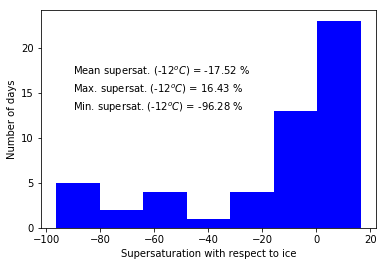

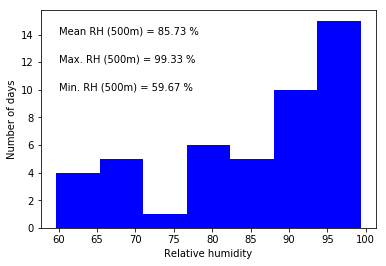

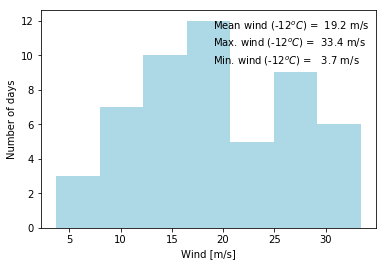

In [8]:
def Magnus(T):
    """
    Compute saturation vapour pressure over water and ice
    """
    eww=6.112*np.exp((17.62*T)/(243.12+T))
    ewi=6.112*np.exp((22.46*T)/(272.62+T))                 
    return eww, ewi

ews, ewi = Magnus(-12)
print('ews, ewi, diff',ews, ewi, ews-ewi)                     

path2="/home/silke/Python/projects/climatology/"
f = open(path2 + 'supersat.txt', 'wb')

#RH=rel.hum, ew=water vapour pressure=fkt(T)
f.write("%9s %8s %7s %7s %5s %6s %8s %8s %8s %8s" %
          ('Date', 'Height', 'Pressure', 'MixingR', 'RH', 'ewi', 'ew', 'sswrtice', 'RHSfc', 'Wind\n')) 
SS=np.zeros(len(dates))
RHSfc=np.zeros(len(dates))
Wind=np.zeros(len(dates))
nr=np.zeros(len(dates))
for k in range(len(dates)):
#for k in range(23,24):    
    date=dates[k]
    print(date)
    
    filename = os.path.join('/home/silke/Python/radarlecture2016/radarmeteorology/common/radarmet_data/stations', 
                            'radio_'+dates[k]+'.txt')
    radio = np.genfromtxt(filename, skip_header=8, autostrip=True, 
                         invalid_raise=False)
    stemp = radio[:, 2]
    sheight = radio[:, 1]
    srelhum = radio[:, 4]
    spress = radio[:, 0]
    smixing = radio[:, 5]
    swind = radio[:,7]
    # remove nans
    idx = np.isfinite(stemp)
    stemp = stemp[idx]
    srelhum = srelhum[idx]
    sheight = sheight[idx]
    spress = spress[idx]
    smixing = smixing[idx]
    swind = swind[idx]
    # highres height
    ht = np.arange(0., 20000.)
    ipolfunc = interpolate.interp1d(sheight, stemp, kind='linear', 
                                    bounds_error=False)
    ipolfuncRH = interpolate.interp1d(sheight, srelhum, kind='linear', 
                                    bounds_error=False)
    ipolfuncP = interpolate.interp1d(sheight, spress, kind='linear', 
                                    bounds_error=False)
    ipolfuncM = interpolate.interp1d(sheight, smixing, kind='linear', 
                                    bounds_error=False)
    ipolfuncW = interpolate.interp1d(sheight, swind, kind='linear', 
                                    bounds_error=False)
    itemp = ipolfunc(ht)

    

    mask1 = (itemp <= -11.99) & (itemp >= -12.01)
    h=ht[mask1]
    ht12=h[0]
    
    ## relhum where temp=-12
    RH = ipolfuncRH(ht12)
    RHS = ipolfuncRH(500)
    #Pressure in hPa
    P =ipolfuncP(ht12)
    #mixing ratio
    M=ipolfuncM(ht12)
    #wind
    W=ipolfuncW(ht12)
    #water vapor pressure in Pa
    ew=M*10**(-3)*P*100/0.622
    sswrtice=(ew/(ewi*100))-1
    SS[k]=sswrtice
    nr[k]=k
    RHSfc[k]=RHS
    #Umrechnung von Knoten in km/h 
    Wind[k]=W*1.852

    print("ht12, Pressure, Mixing ratio, RH, ewi, ew, sswrtice, RHSfc, Wkm/h")
    print(ht12, P, M, RH, ewi, ew/100, sswrtice, RHS, W)

    
    f.write("%7s %7.2f %7.2f %7.2f %7.2f %7.2f %7.2f %7.2f %7.2f %7.2f\n" %
              (date, ht12, P, M, RH, ewi, ew/100, sswrtice, RHS, W*1.852))

fig = pl.figure()
#SS=np.stack(SS)
SS=SS*100
SS_ave=np.nanmean(SS, axis=0)
SS_max=np.nanmax(SS, axis=0)
SS_min=np.nanmin(SS, axis=0)
pl.hist(SS, bins='auto', color='blue')
pl.annotate(r'Mean supersat. (-12$^oC$) = %5.2f %%' % (SS_ave), xy=(-90,17),xytext=(-90,17))
pl.annotate(r'Max. supersat. (-12$^oC$) = %5.2f %%' % (SS_max), xy=(-90,15),xytext=(-90,15))
pl.annotate(r'Min. supersat. (-12$^oC$) = %5.2f %%' % (SS_min), xy=(-90,13),xytext=(-90,13))
pl.xlabel(r"Supersaturation with respect to ice")
pl.ylabel(r"Number of days")
fig.savefig('/home/silke/Python/projects/climatology/supersat.png')
#pl.plot(nr,SS,'bx')
pl.show()


fig = pl.figure()
#SS=np.stack(SS)
RHSfc_ave=np.nanmean(RHSfc, axis=0)
RHSfc_max=np.nanmax(RHSfc, axis=0)
RHSfc_min=np.nanmin(RHSfc, axis=0)
missing= np.isnan(RHSfc) 
RHSfc=RHSfc[~missing]          
pl.hist(RHSfc, bins='auto', color='blue')
pl.annotate(r'Mean RH (500m) = %5.2f %%' % (RHSfc_ave), xy=(60,14),xytext=(60,14))
pl.annotate(r'Max. RH (500m) = %5.2f %%' % (RHSfc_max), xy=(60,12),xytext=(60,12))
pl.annotate(r'Min. RH (500m) = %5.2f %%' % (RHSfc_min), xy=(60,10),xytext=(60,10))
pl.xlabel(r"Relative humidity")
pl.ylabel(r"Number of days")
fig.savefig('/home/silke/Python/projects/climatology/RH_Surface.png')

fig = pl.figure()
#SS=np.stack(SS)

#Recalculate wind in m/s
# From km/h to m/s 
Wind_ms = Wind/3.6
W_ave=np.nanmean(Wind_ms, axis=0)
W_max=np.nanmax(Wind_ms, axis=0)
W_min=np.nanmin(Wind_ms, axis=0)
pl.hist(Wind_ms, bins='auto', color='lightblue')
pl.annotate(r'Mean wind (-12$^oC$) = %5.1f m/s' % (W_ave), xy=(19,11.5),xytext=(19,11.5))
pl.annotate(r'Max. wind (-12$^oC$) = %5.1f m/s' % (W_max), xy=(19,10.5),xytext=(19,10.5))
pl.annotate(r'Min. wind (-12$^oC$) = %5.1f m/s' % (W_min), xy=(19,9.5),xytext=(19,9.5))
pl.xlabel(r"Wind [m/s]")
pl.ylabel(r"Number of days")
fig.savefig('/home/silke/Python/projects/climatology/DGL_Wind.png')
#pl.plot(nr,SS,'bx')
pl.show()
f.close()    